# Advection Equation

Here I solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

I use a domain $x\in [0,10]$ with periodic boundary conditions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

## FTCS

In [2]:
#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the time step and the final time
cf = 0.5
dt = cf*dx/abs(a)   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()

#create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [3]:
##create directory where to save images
os.makedirs('./FTCS/images_gaussian', exist_ok=True)

In [4]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(-1.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.savefig('./FTCS/images_gaussian/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))    
    
    # Update the solution
    u_current = u_next.copy()
    
    #advance the time 
    t += dt
    i += 1

    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(-1.1,1.1)
        plt.xlabel('x')
        plt.ylabel('u', rotation=0)
        plt.savefig('./FTCS/images_gaussian/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()
   

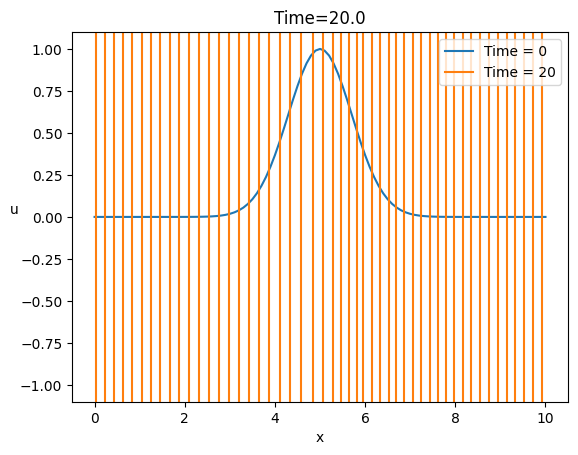

In [5]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Time='+str(round(t,2)))
plt.ylim(-1.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.show()

In [6]:
# set the directory where images are stored
directory = "./FTCS/images_gaussian/"

# get the list of image files in the directory
files = os.listdir(directory)
# sort the files in alphanumeric order
files=sorted(files)

In [7]:
import imageio.v2 as imageio
with imageio.get_writer('./FTCS/movie_gaussian.mov', mode='I') as writer:
    for file in files:
        image = imageio.imread('./FTCS/images_gaussian/'+file)
        writer.append_data(image)      
files=[]

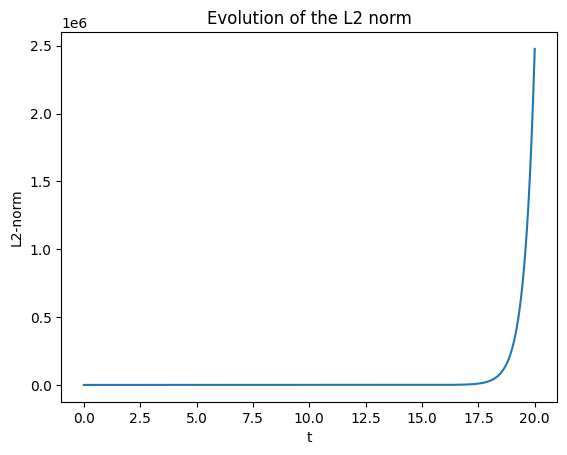

In [8]:
plt.plot(time,l2norm)
plt.title('Evolution of the L2 norm')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./FTCS/FTCS_L2.png', dpi=200)

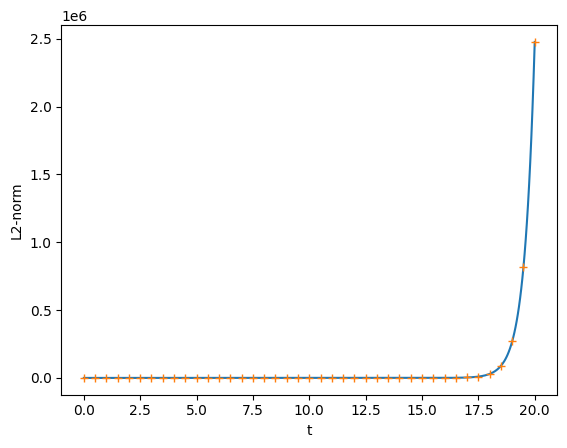

In [9]:
#Compare with data stored
l2_saved=np.genfromtxt('./FTCS/l2norm_FTCS.dat', comments='#')
plt.plot(time,l2norm)
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.show()

#### Changing the number of points

In [10]:
L = 10.0
nx = 301
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 0.5
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

x0=5
u_initial = np.exp(-(x-x0)**2)
u_current = u_initial.copy()
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
time=[]
time.append(0.0)

t = 0.0
i = 0

while t < t_final:  
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))    
    u_current = u_next.copy()
    t += dt
    i += 1
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

nx= 301
dx= 0.03333333333333333
dt= 0.016666666666666666
Number of iterations= 1200.0


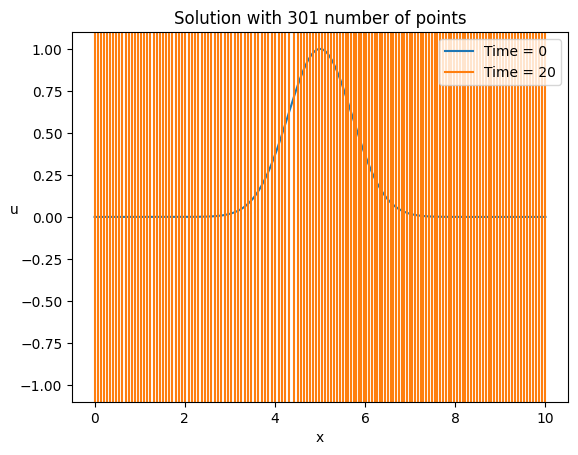

In [11]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Solution with 301 number of points')
plt.ylim(-1.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./FTCS/FTCS_sol_301.png', dpi=200)

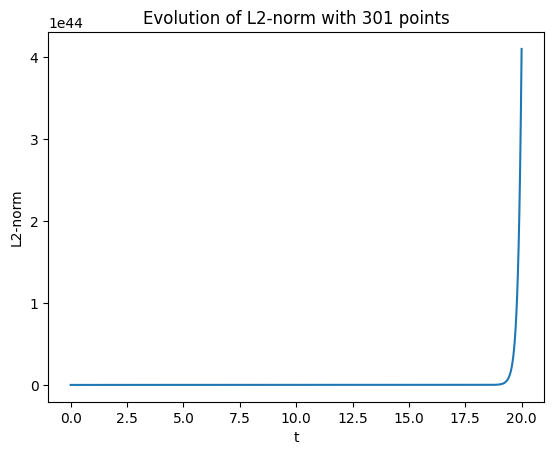

In [12]:
plt.plot(time, l2norm)
plt.title('Evolution of L2-norm with 301 points')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./FTCS/FTCS_norm_301.png', dpi=200)

#### Changing the courant factor

In [13]:
L = 10.0
nx = 101
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 0.1
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

x0=5
u_initial = np.exp(-(x-x0)**2)
u_current = u_initial.copy()
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
time=[]
time.append(0.0)

t = 0.0
i = 0

while t < t_final:  
    u_next = u_current - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))    
    u_current = u_next.copy()
    t += dt
    i += 1
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

nx= 101
dx= 0.1
dt= 0.010000000000000002
Number of iterations= 1999.9999999999995


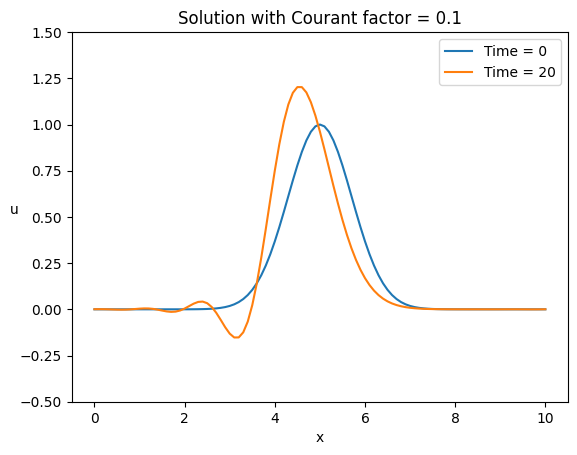

In [14]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Solution with Courant factor = 0.1')
plt.ylim(-0.5,1.5)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./FTCS/FTCS_sol_cf01.png',dpi=200)

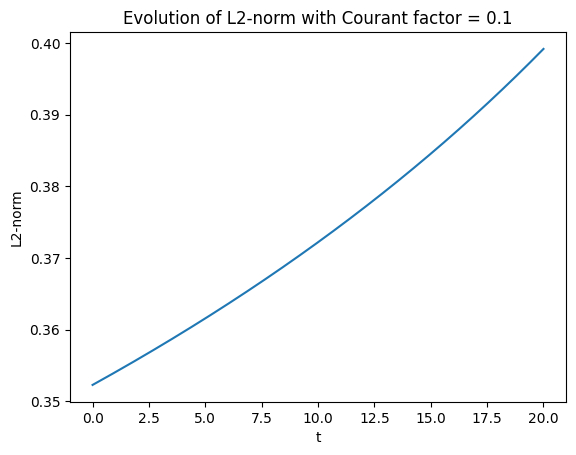

In [15]:
plt.plot(time, l2norm)
plt.title('Evolution of L2-norm with Courant factor = 0.1')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./FTCS/FTCS_norm_cf01.png', dpi=200)

## LAX-FRIEDRICHS

In [16]:
os.makedirs('./LAXF/images_gaussian', exist_ok=True)

In [17]:
a=1.0
L = 10.0
nx = 101
dx = L/(nx-1)
x = np.linspace(0, L, nx)
cf = 0.5
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

x0=5
u_initial = np.exp(-(x-x0)**2)

u_current = u_initial.copy()

l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [18]:
t = 0.0
i = 0

plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.savefig('./LAXF/images_gaussian/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

while t < t_final:
    
    u_next = (1/2)*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))   
    u_current = u_next.copy()

    t += dt
    i += 1

    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.xlabel('x')
        plt.ylabel('u', rotation=0)
        plt.savefig('./LAXF/images_gaussian/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

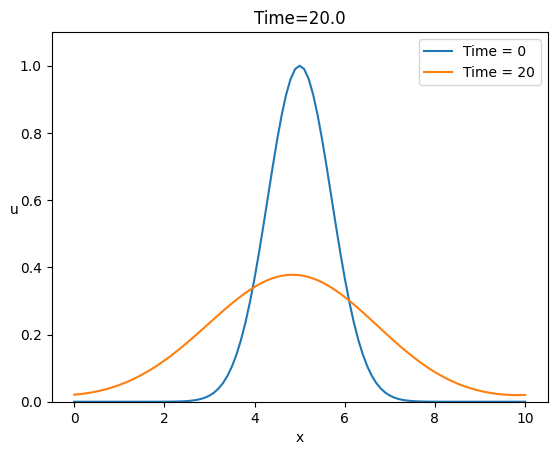

In [19]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.show()

In [20]:
directory = "./LAXF/images_gaussian/"
files = os.listdir(directory)
files=sorted(files)

In [21]:
import imageio.v2 as imageio
with imageio.get_writer('./LAXF/movie_gaussian.mov', mode='I') as writer:
    for file in files:
        image = imageio.imread('./LAXF/images_gaussian/'+file)
        writer.append_data(image)      
files=[]

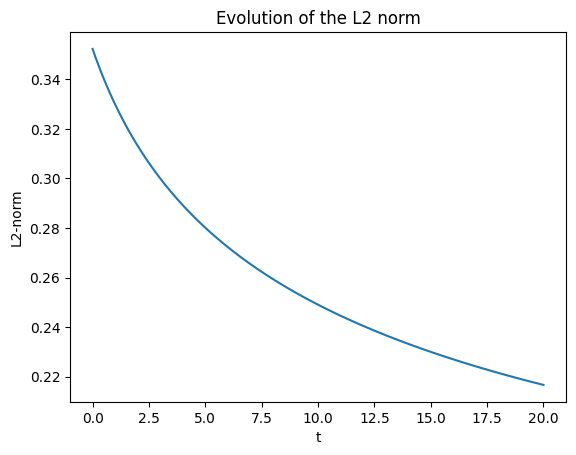

In [22]:
plt.plot(time,l2norm)
plt.title('Evolution of the L2 norm')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./LAXF/LAXF_L2.png', dpi=200)

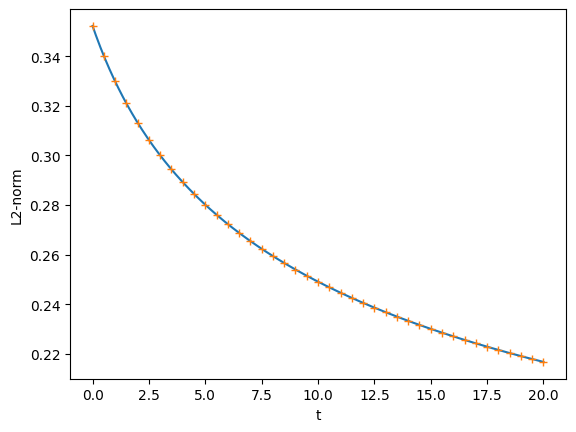

In [23]:
l2_saved=np.genfromtxt('./LAXF/l2norm_LAX.dat', comments='#')
plt.plot(time,l2norm)
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.show()

#### Changing the number of points

In [24]:
L = 10.0
nx = 1001
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 0.5
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

x0=5
u_initial = np.exp(-(x-x0)**2)
u_current = u_initial.copy()
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
time=[]
time.append(0.0)

t = 0.0
i = 0

while t < t_final:  
    u_next = (1/2)*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))   
    u_current = u_next.copy()
    t += dt
    i += 1
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

nx= 1001
dx= 0.01
dt= 0.005
Number of iterations= 4000.0


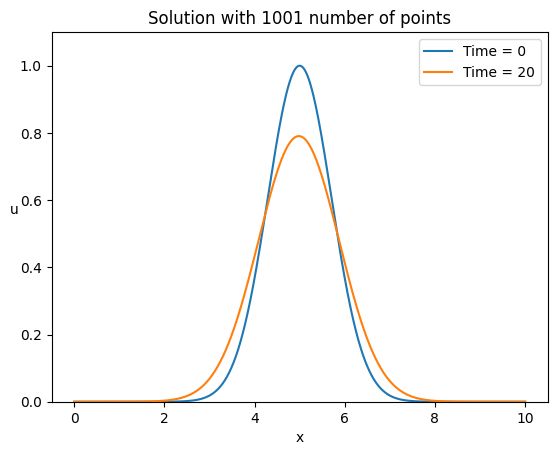

In [25]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Solution with 1001 number of points')
plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./LAXF/LAXF_sol_1001.png', dpi=200)

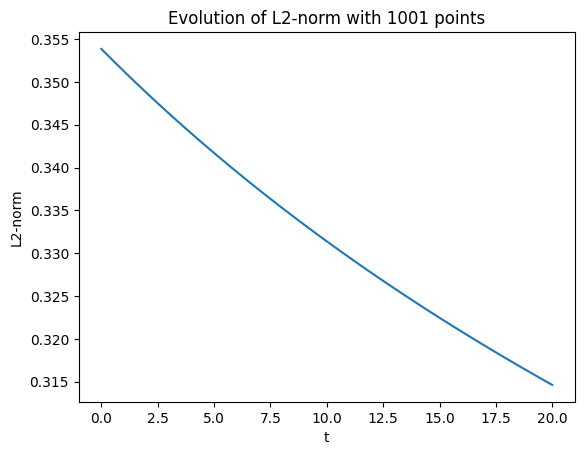

In [26]:
plt.plot(time, l2norm)
plt.title('Evolution of L2-norm with 1001 points')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./LAXF/LAXF_norm_1001.png', dpi=200)

#### Changing the courant factor

In [27]:
L = 10.0
nx = 101
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 0.999
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

x0=5
u_initial = np.exp(-(x-x0)**2)
u_current = u_initial.copy()
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
time=[]
time.append(0.0)

t = 0.0
i = 0

while t < t_final:
    u_next = (1/2)*(np.roll(u_current, -1) + np.roll(u_current, 1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))   
    u_current = u_next.copy()
    t += dt
    i += 1
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

nx= 101
dx= 0.1
dt= 0.0999
Number of iterations= 200.2002002002002


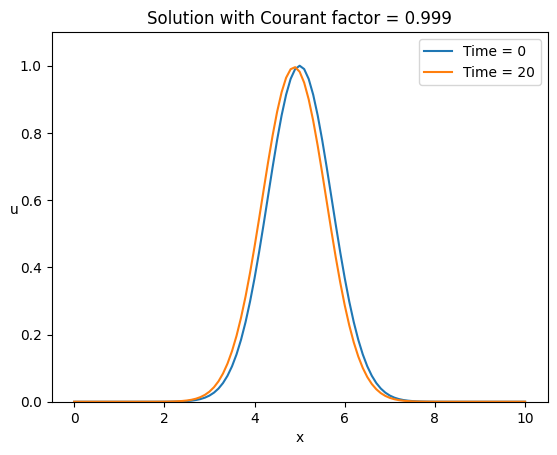

In [28]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Solution with Courant factor = 0.999')
plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./LAXF/LAXF_sol_cf99.png',dpi=200)

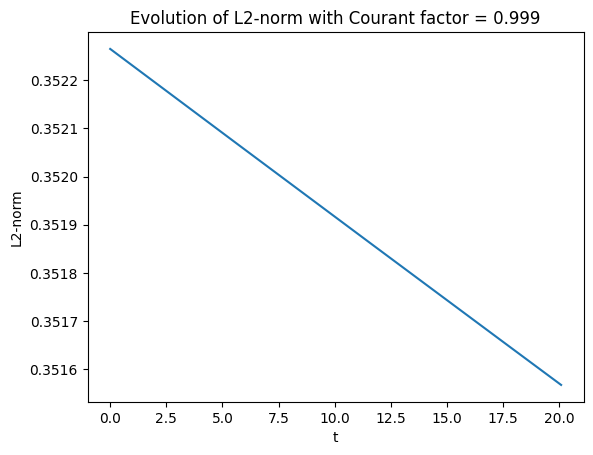

In [29]:
plt.plot(time, l2norm)
plt.title('Evolution of L2-norm with Courant factor = 0.999')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./LAXF/LAXF_norm_cf99.png', dpi=200)

## LEAPFROG

In [30]:
os.makedirs('./Leapfrog/images_gaussian', exist_ok=True)

In [31]:
a=1.0
L = 10.0
nx = 101
dx = L/(nx-1)
x = np.linspace(0, L, nx)
cf = 0.5
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

x0=5
u_initial = np.exp(-(x-x0)**2)
u_previous = np.exp(-(x-x0+a*dt)**2)
# Initialize the solution array
u_current = u_initial.copy()
u_prev = u_previous.copy()

l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [32]:
t = 0.0
i = 0

plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.savefig('./Leapfrog/images_gaussian/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

while t < t_final:
    
    u_next = u_prev - a*dt/(dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    u_prev = u_current.copy()
    u_current = u_next.copy()   

    t += dt
    i += 1

    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(-0.1,1.1)
        plt.xlabel('x')
        plt.ylabel('u', rotation=0)
        plt.savefig('./Leapfrog/images_gaussian/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

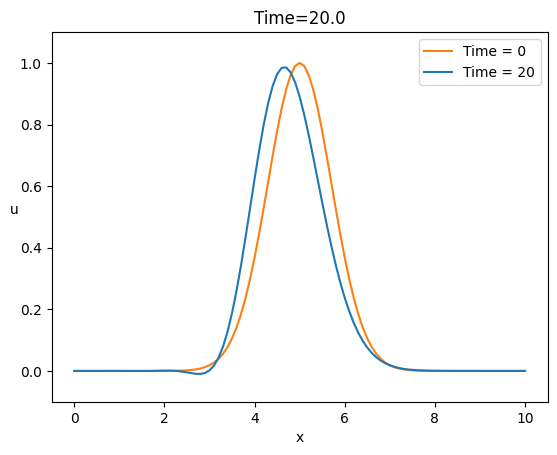

In [33]:
plt.plot(x, u_initial, label='Time = 0', c='C1')
plt.plot(x, u_current, label='Time = 20', c='C0')
plt.title('Time='+str(round(t,2)))
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./Leapfrog/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.show()

In [34]:
directory = "./Leapfrog/images_gaussian/"
files = os.listdir(directory)
files=sorted(files)

In [35]:
import imageio.v2 as imageio
with imageio.get_writer('./Leapfrog/movie_gaussian.mov', mode='I') as writer:
    for file in files:
        image = imageio.imread('./Leapfrog/images_gaussian/'+file)
        writer.append_data(image)      
files=[]

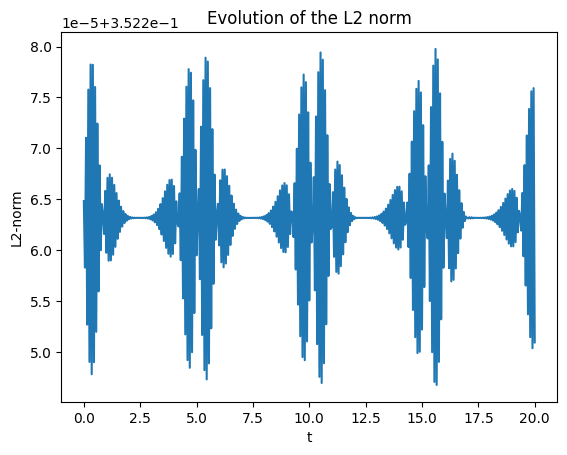

In [36]:
plt.plot(time,l2norm)
plt.title('Evolution of the L2 norm')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./Leapfrog/Leapfrog_L2.png', dpi=200)

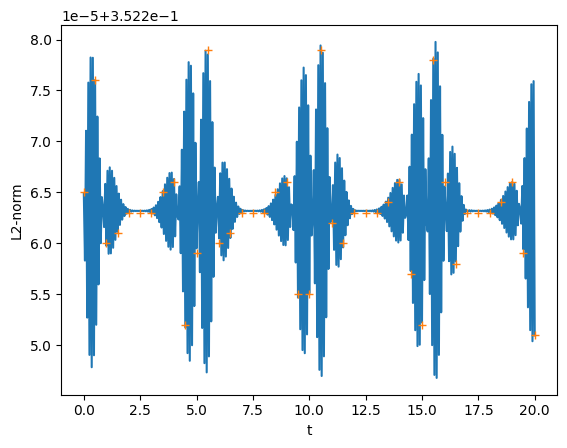

In [37]:
l2_saved=np.genfromtxt('./Leapfrog/l2norm_LEAPFROG.dat', comments='#')
plt.plot(time,l2norm)
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.show()

#### Changing the number of points

In [38]:
L = 10.0
nx = 1001
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 0.5
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

x0=5
u_initial = np.exp(-(x-x0)**2)
u_previous = np.exp(-(x-x0+a*dt)**2)
u_current = u_initial.copy()
u_prev = u_previous.copy()
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
time=[]
time.append(0.0)

t = 0.0
i = 0

while t < t_final:  
    u_next = u_prev - a*dt/(dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    u_prev = u_current.copy()
    u_current = u_next.copy()
    t += dt
    i += 1
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

nx= 1001
dx= 0.01
dt= 0.005
Number of iterations= 4000.0


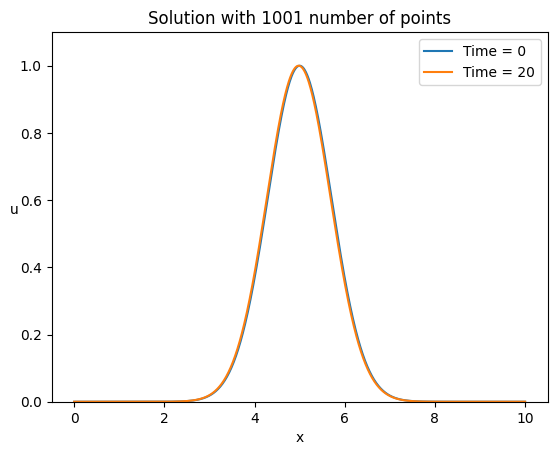

In [39]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Solution with 1001 number of points')
plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./Leapfrog/Leapfrog_sol_1001.png', dpi=200)

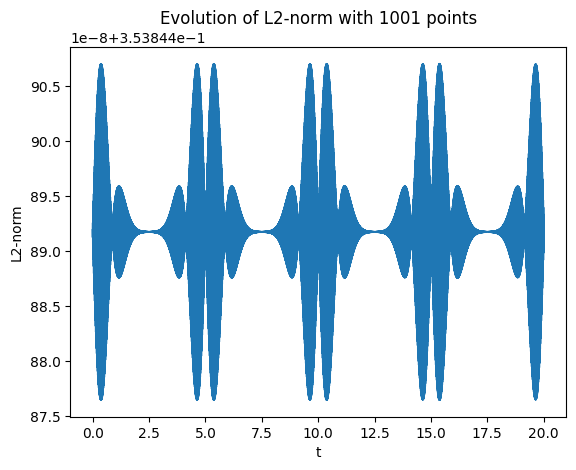

In [40]:
plt.plot(time, l2norm)
plt.title('Evolution of L2-norm with 1001 points')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./Leapfrog/Leapfrog_norm_1001.png', dpi=200)

#### Changing the courant factor

In [41]:
L = 10.0
nx = 101
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 1.01
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

x0=5
u_initial = np.exp(-(x-x0)**2)
u_previous = np.exp(-(x-x0+a*dt)**2)
u_current = u_initial.copy()
u_prev = u_previous.copy()

l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
time=[]
time.append(0.0)

t = 0.0
i = 0

while t < t_final:
    u_next = u_prev - a*dt/(dx)*(np.roll(u_current, -1) - np.roll(u_current, 1))
    u_prev = u_current.copy()
    u_current = u_next.copy()
    t += dt
    i += 1
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

nx= 101
dx= 0.1
dt= 0.101
Number of iterations= 198.019801980198


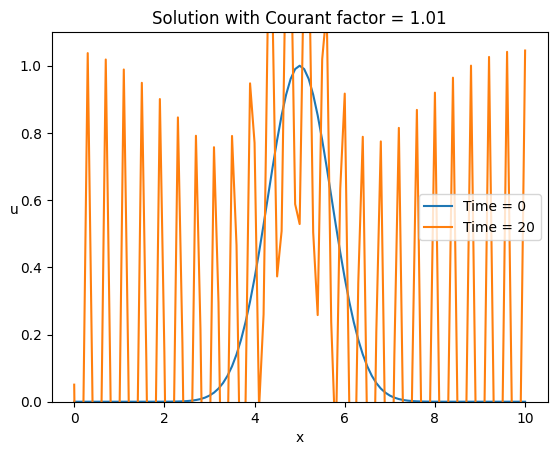

In [42]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Solution with Courant factor = 1.01')
plt.ylim(0,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./Leapfrog/Leapfrog_sol_cf101.png',dpi=200)

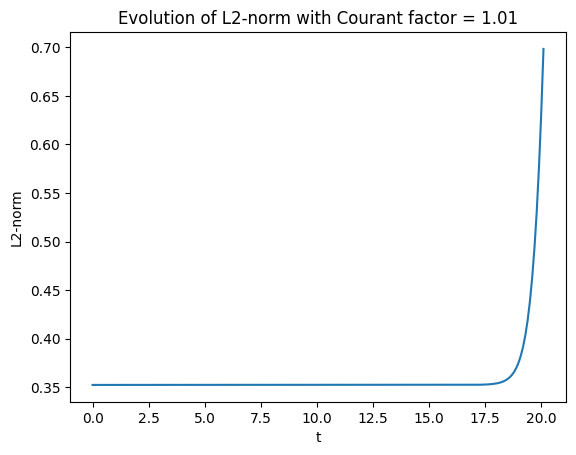

In [43]:
plt.plot(time, l2norm)
plt.title('Evolution of L2-norm with Courant factor = 1.01')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./Leapfrog/Leapfrog_norm_cf101.png', dpi=200)

## LAX-WENDROFF

In [44]:
os.makedirs('./LAXW/images_gaussian', exist_ok=True)

In [45]:
a=1.0
L = 10.0
nx = 101
dx = L/(nx-1)
x = np.linspace(0, L, nx)
cf = 0.5
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

x0=5
u_initial = np.exp(-(x-x0)**2)

u_current = u_initial.copy()

l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 400.0


In [46]:
t = 0.0
i = 0

plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.savefig('./LAXW/images_gaussian/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

while t < t_final:
    
    u_next = u_current -a*(dt)/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) + (0.5)*((a*(dt)/(dx))**2)*(np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1))   
    u_current = u_next.copy()

    t += dt
    i += 1

    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(-0.1,1.1)
        plt.xlabel('x')
        plt.ylabel('u', rotation=0)
        plt.savefig('./LAXW/images_gaussian/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()

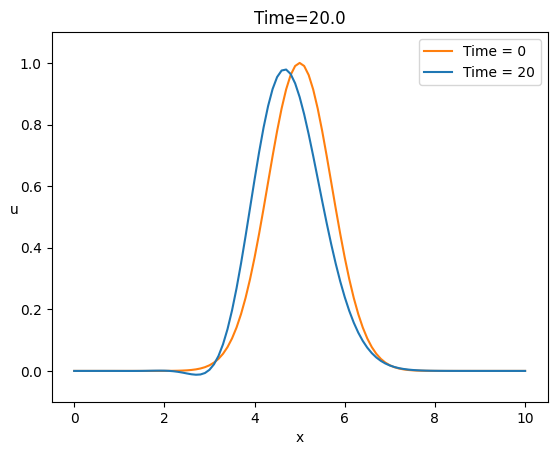

In [47]:
plt.plot(x, u_initial, label='Time = 0', c='C1')
plt.plot(x, u_current, label='Time = 20', c='C0')
plt.title('Time='+str(round(t,2)))
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./LAXW/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.show()

In [48]:
directory = "./LAXW/images_gaussian/"
files = os.listdir(directory)
files=sorted(files)

In [49]:
import imageio.v2 as imageio
with imageio.get_writer('./LAXW/movie_gaussian.mov', mode='I') as writer:
    for file in files:
        image = imageio.imread('./LAXW/images_gaussian/'+file)
        writer.append_data(image)      
files=[]

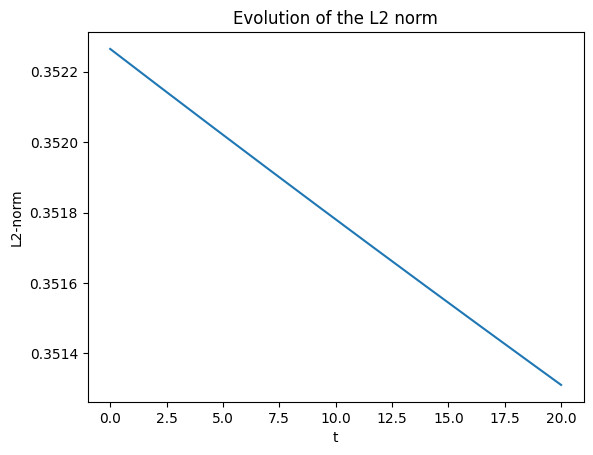

In [50]:
plt.plot(time,l2norm)
plt.title('Evolution of the L2 norm')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./LAXW/LAXW_L2.png', dpi=200)

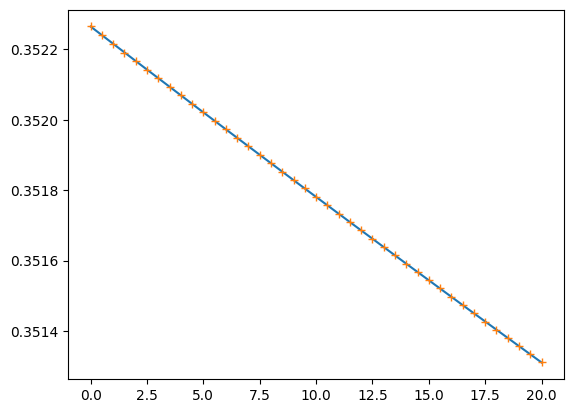

In [51]:
l2_saved=np.genfromtxt('./LAXW/l2norm_LAXWENDROFF.dat', comments='#')
plt.plot(time,l2norm)
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.show()

#### Changing the number of points

In [52]:
L = 10.0
nx = 1001
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 0.5
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

x0=5
u_initial = np.exp(-(x-x0)**2)
u_current = u_initial.copy()
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
time=[]
time.append(0.0)

t = 0.0
i = 0

while t < t_final:  
    u_next = u_current -a*(dt)/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) + (0.5)*((a*(dt)/(dx))**2)*(np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1))
        
    u_current = u_next.copy()
    t += dt
    i += 1
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

nx= 1001
dx= 0.01
dt= 0.005
Number of iterations= 4000.0


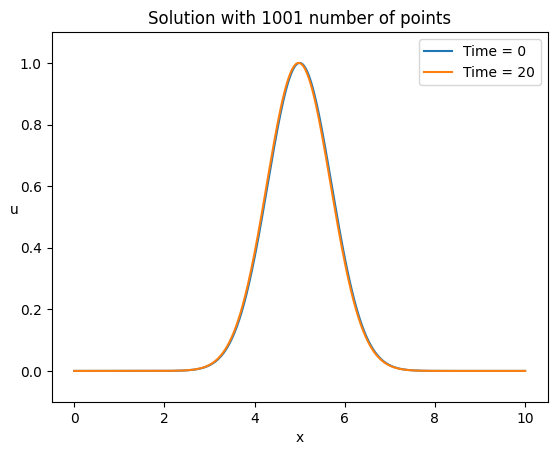

In [53]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Solution with 1001 number of points')
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./LAXW/LAXW_sol_1001.png', dpi=200)

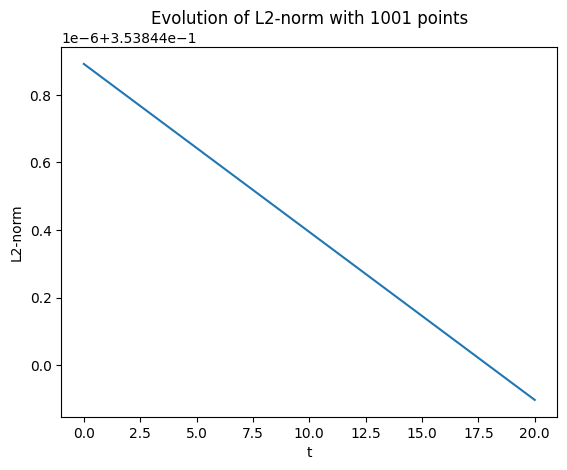

In [54]:
plt.plot(time, l2norm)
plt.title('Evolution of L2-norm with 1001 points')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./LAXW/LAXW_norm_1001.png', dpi=200)

In [55]:
L = 10.0
nx = 71
dx = L/(nx-1)
x = np.linspace(0, L, nx)

cf = 0.5
dt = cf*dx/abs(a)
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

x0=5
u_initial = np.exp(-(x-x0)**2)
u_current = u_initial.copy()
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
time=[]
time.append(0.0)

t = 0.0
i = 0

while t < t_final:
    u_next = u_current -a*(dt)/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, 1)) + (0.5)*((a*(dt)/(dx))**2)*(np.roll(u_current, -1) - 2*u_current + np.roll(u_current, 1))   
    u_current = u_next.copy()
    t += dt
    i += 1
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)

nx= 71
dx= 0.14285714285714285
dt= 0.07142857142857142
Number of iterations= 280.0


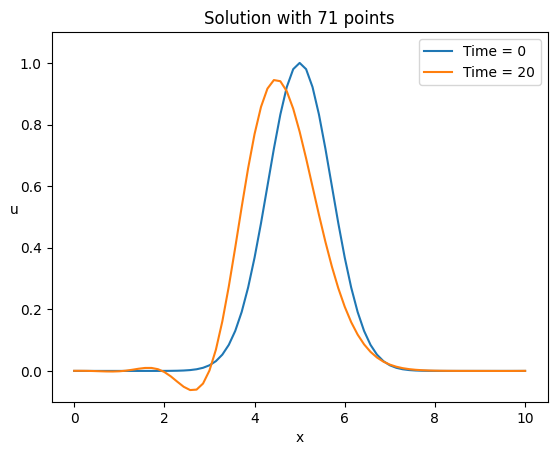

In [56]:
plt.plot(x, u_initial, label='Time = 0')
plt.plot(x, u_current, label='Time = 20')
plt.title('Solution with 71 points')
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.ylabel('u', rotation=0)
plt.legend()
plt.savefig('./LAXW/LAXW_sol_71.png',dpi=200)

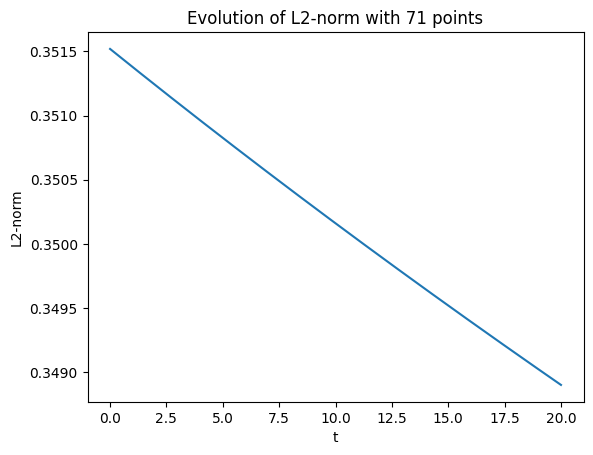

In [57]:
plt.plot(time, l2norm)
plt.title('Evolution of L2-norm with 71 points')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.savefig('./LAXW/LAXW_norm_71.png', dpi=200)